# pywikipathways and py4cytoscape
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/kozo2/pywikipathways/blob/main/docs/pywikipathways-and-py4cytoscape.ipynb)

**by Kozo Nishida, Barry Demchak, Alexander Pico**

pywikipathways 0.0.2  
py4cytoscape 0.0.10

*WikiPathways* is a well-known repository for biological pathways that provides unique tools to the research community for content creation, editing and utilization [@Pico2008].

**Python** is a powerful programming language and environment for statistical and exploratory data analysis.

*pywikipathways* leverages the WikiPathways API to communicate between **Python** and WikiPathways, allowing any pathway to be queried, interrogated and downloaded in both data and image formats. Queries are typically performed based on “Xrefs”, standardized identifiers for genes, proteins and metabolites. Once you can identified a pathway, you can use the WPID (WikiPathways identifier) to make additional queries.

*py4cytoscape* leverages the CyREST API to provide a number of functions related to network visualization and analysis.

## Prerequisites
In addition to this **pywikipathways** package, you’ll also need to install cytoscape and py4cytoscape:

In [ ]:
!pip install pywikipathways

The whole point of py4cytoscape is to connect with Cytoscape. You will need to install and launch Cytoscape:

- Download the latest Cytoscape from http://www.cytoscape.org/download.php
- Complete installation wizard
- Launch Cytoscape
- Install FileTransfer App (Follow [here](https://py4cytoscape.readthedocs.io/en/0.0.10/tutorials/index.html) to do it.)

**NOTE: To run this notebook, you must manually start Cytoscape first – don’t proceed until you have started Cytoscape.**

### Setup required only in a remote notebook environment
If you’re using a remote Jupyter Notebook environment such as Google Colab, run the cell below. (If you’re running a local Jupyter Notebook server on the desktop machine same with Cytoscape, you don’t need to do that.)

In [ ]:
_PY4CYTOSCAPE = 'git+https://github.com/cytoscape/py4cytoscape@0.0.10'
import requests
exec(requests.get("https://raw.githubusercontent.com/cytoscape/jupyter-bridge/master/client/p4c_init.py").text)
IPython.display.Javascript(_PY4CYTOSCAPE_BROWSER_CLIENT_JS) # Start browser client

### Getting started
First, confirm that you have everything installed and running:

In [33]:
import pywikipathways as pwpw

In [34]:
import py4cytoscape as p4c

In [35]:
p4c.cytoscape_ping()

You are connected to Cytoscape!


'You are connected to Cytoscape!'

For this vignette, you’ll also need the WikiPathways app to access the WikiPathways database from within Cytoscape. Install the WikiPathways app from http://apps.cytoscape.org/apps/wikipathways

If you are running Cytoscape 3.7.0 or above, you can simply run this command:

In [3]:
p4c.install_app('WikiPathways') #only available in Cytoscape 3.7.0 and above

{}


{}

## Working together
Ok, with all of these components loaded and launched, you can now perform some nifty sequences. For example, search for a pathway based on a keyword search and then load it into Cytoscape.

In [36]:
gbm_pathways = pwpw.find_pathways_by_text('Glioblastoma') # many pathways returned

In [37]:
gbm_pathways

,score,id,url,name,species,revision
0,1.0189675,WP3593,https://www.wikipathways.org/index.php/Pathway...,MicroRNA for targeting cancer growth and vascu...,Homo sapiens,117786
1,0.79327244,WP2261,https://www.wikipathways.org/index.php/Pathway...,Glioblastoma signaling pathways,Homo sapiens,118379
2,0.79327244,WP3266,https://www.wikipathways.org/index.php/Pathway...,Glioblastoma signaling pathways,Bos taurus,116688
3,0.2698266,WP4398,https://www.wikipathways.org/index.php/Pathway...,PDGFR-alpha and STMN1 cooperate to exacerbate ...,Mus musculus,117929
4,0.047133956,WP3998,https://www.wikipathways.org/index.php/Pathway...,Prader-Willi and Angelman syndrome,Homo sapiens,119303


In [38]:
human_gbm_pathways = gbm_pathways[gbm_pathways['species'] == "Homo sapiens"] # just the human gbm  pathways

In [39]:
human_gbm_pathways

,score,id,url,name,species,revision
0,1.0189675,WP3593,https://www.wikipathways.org/index.php/Pathway...,MicroRNA for targeting cancer growth and vascu...,Homo sapiens,117786
1,0.79327244,WP2261,https://www.wikipathways.org/index.php/Pathway...,Glioblastoma signaling pathways,Homo sapiens,118379
4,0.047133956,WP3998,https://www.wikipathways.org/index.php/Pathway...,Prader-Willi and Angelman syndrome,Homo sapiens,119303


We have a list of human pathways that mention Glioblastoma The results include lots of information, so let’s get a unique list of just the WPIDs.

In [40]:
human_gbm_wpids = human_gbm_pathways['id']

In [41]:
human_gbm_wpids

0    WP3593
1    WP2261
4    WP3998
Name: id, dtype: object

Let’s import the first one of these into Cytoscape!

In [42]:
p4c.commands_run('wikipathways import-as-pathway id=' + human_gbm_wpids[0])

[]

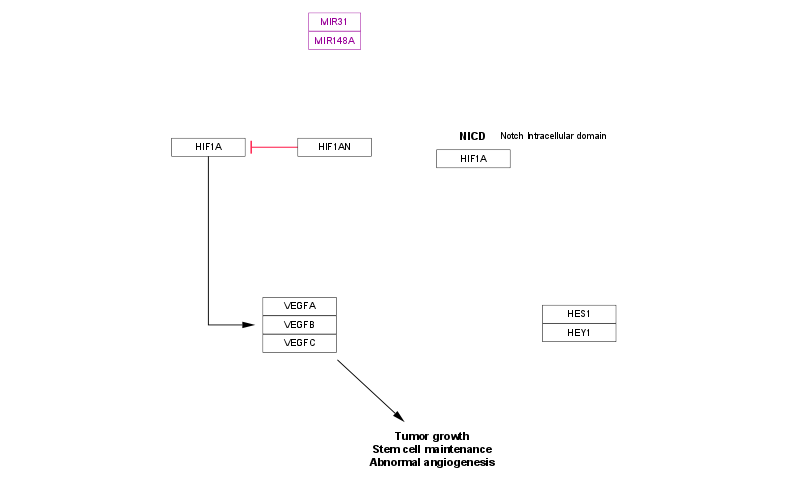

In [43]:
p4c.notebook_show_image()

Once in Cytoscape, you can load data, apply visual style mappings, perform analyses, and export images and data formats. See [py4cytoscape package document](https://py4cytoscape.readthedocs.io/) for details.

## From networks to pathways
If you are already with with networks and data in Cytoscape, you may end up focusing on one or few particular genes, proteins or metabolites, and want to query WikiPathways.

For example, let’s open a sample network from Cytoscape and identify the gene with the largest number of connections, i.e., node degree.

**Note: this next chunk will overwrite your current session. Save if you want to keep anything.**

In [44]:
p4c.open_session()

Opening sampleData/sessions/Yeast Perturbation.cys...


{}

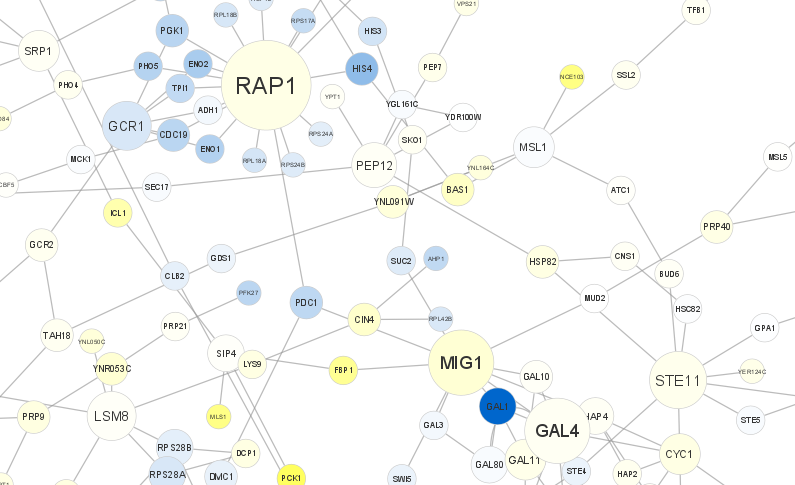

In [45]:
p4c.notebook_show_image()

In [46]:
net_data = p4c.get_table_columns(columns=['name','degree.layout','COMMON'])

In [47]:
net_data

,name,degree.layout,COMMON
159,YDL194W,1,SNF3
160,YDR277C,2,MTH1
161,YBR043C,1,YBR043C
162,YPR145W,1,ASN1
163,YER054C,2,GIP2
...,...,...,...
484,YOR204W,1,DED1
485,YGL097W,3,SRM1
486,YGR218W,1,CRM1
487,YGL122C,3,NAB2


In [48]:
net_data['degree.layout'].max()

18

In [49]:
max_gene = net_data[net_data['degree.layout']==18]

In [50]:
max_gene

,name,degree.layout,COMMON
365,YMR043W,18,MCM1


Great. It looks like MCM1 has the larget number of connections (18) in this network. Let’s use it’s identifier (YMR043W) to query WikiPathways to learn more about the gene and its biological role, and load it into Cytoscape.

*Pro-tip: We need to know the datasource that provides a given identifier. In this case, it’s sort of tricky: Ensembl provides these Yeast ORF identifiers for this organism rather than they typical format. So, we’ll include the ‘En’ system code. See other vignettes for more details.*

In [51]:
mcm1_pathways = pwpw.find_pathway_ids_by_xref('YMR043W','En').unique()

In [52]:
p4c.commands_run('wikipathways import-as-pathway id=' + mcm1_pathways[0])

[]

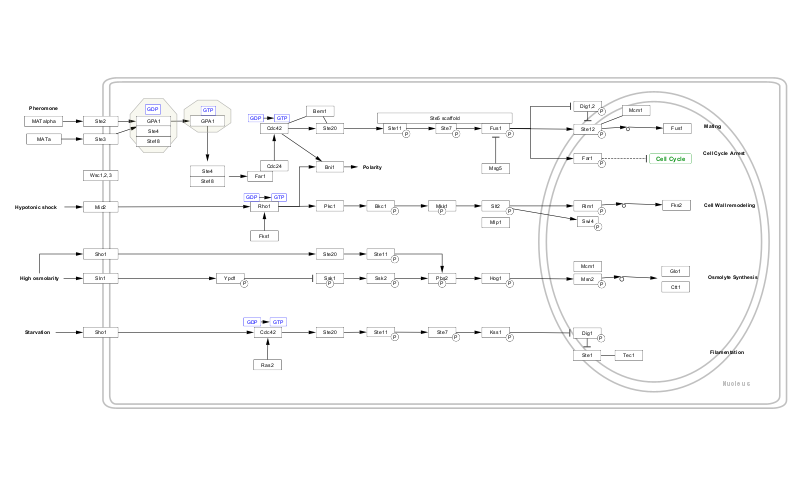

In [53]:
p4c.notebook_show_image()

And we can easily select the MCM1 node by name in the newly imported pathway to help see where exactly it plays its role.

In [54]:
p4c.select_nodes('MCM1','name')

{'nodes': [1615, 1618], 'edges': []}

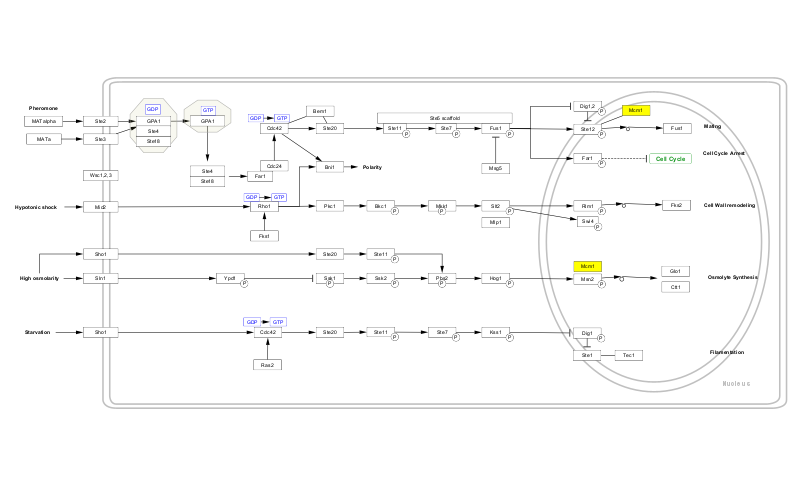

In [55]:
p4c.notebook_show_image()